# Anomaly detection - Credit card transactions - using Gaussian distribution

In [1]:
# Import libraries

# Pandas for data frame
import pandas as pd

# Numpy for numerical calc
import numpy as np

# matplotlib for plots
import matplotlib.pyplot as plt

# seaborn for plots
import seaborn as sns

# Train test split
from sklearn.model_selection import train_test_split

# For statistical test
from scipy.stats import ttest_ind

# Default dictionary
from collections import defaultdict

# For Gaussian estimation
from scipy.stats import multivariate_normal

# For metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [2]:
# Load the data into dataframe
df_cc = pd.read_csv("C:\Myprojects\Dev\Datasets\creditcard.csv")

In [3]:
# Find basic info of the data
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
# Quick view of data sample
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Count of each class
df_cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Above data shows it is highly skewed data

In [6]:
# Find the stats 
df_cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


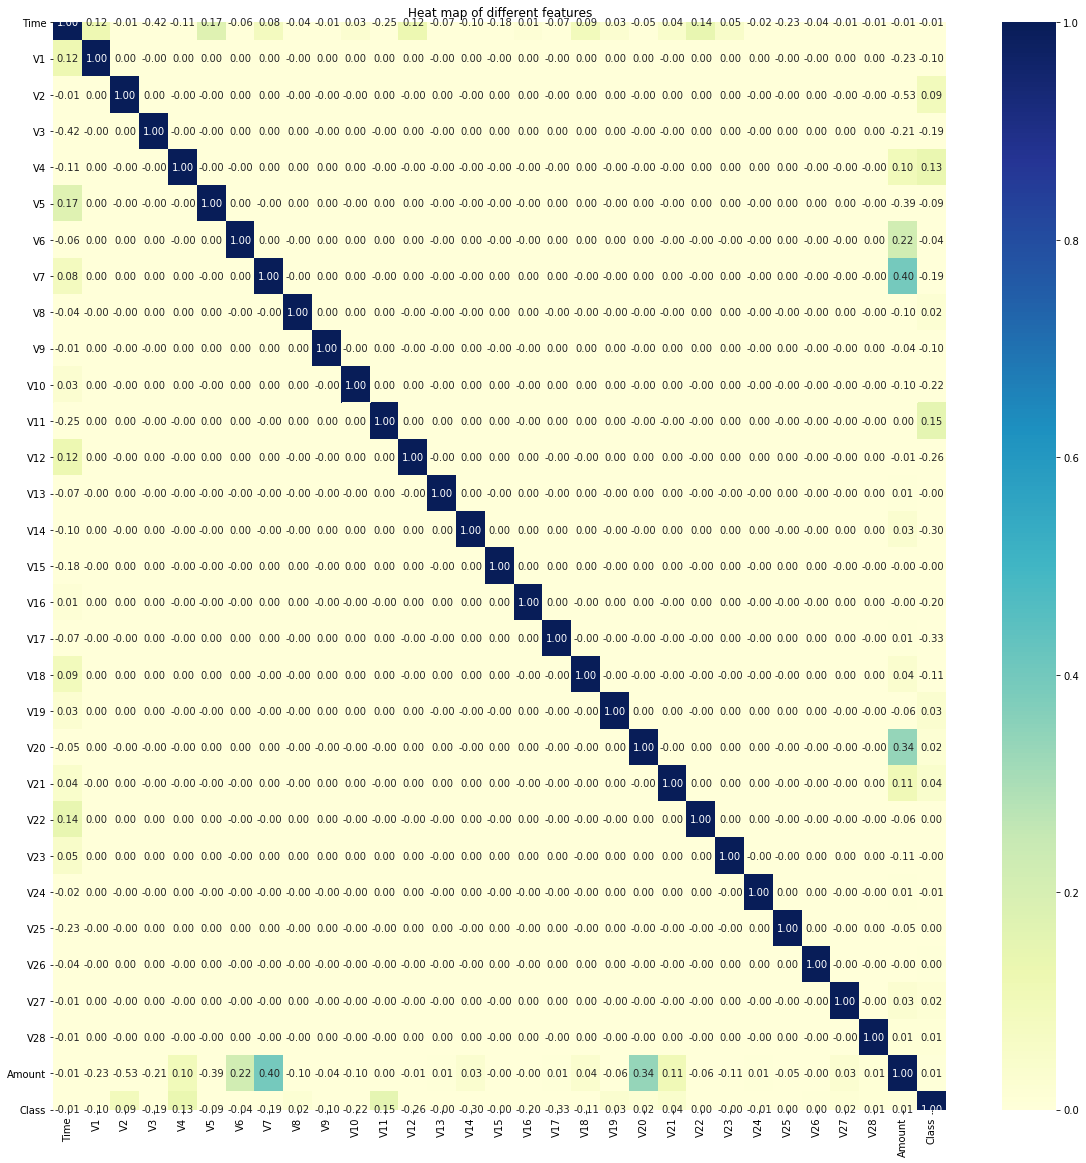

In [7]:
# Plot correlations
plt.figure(figsize=(20,20));
sns.heatmap(df_cc.corr(),annot=True,fmt='.2f',cmap="YlGnBu",vmin=0.0,vmax=1.0);
plt.title('Heat map of different features')
plt.show()

Histogram plots of all features, label


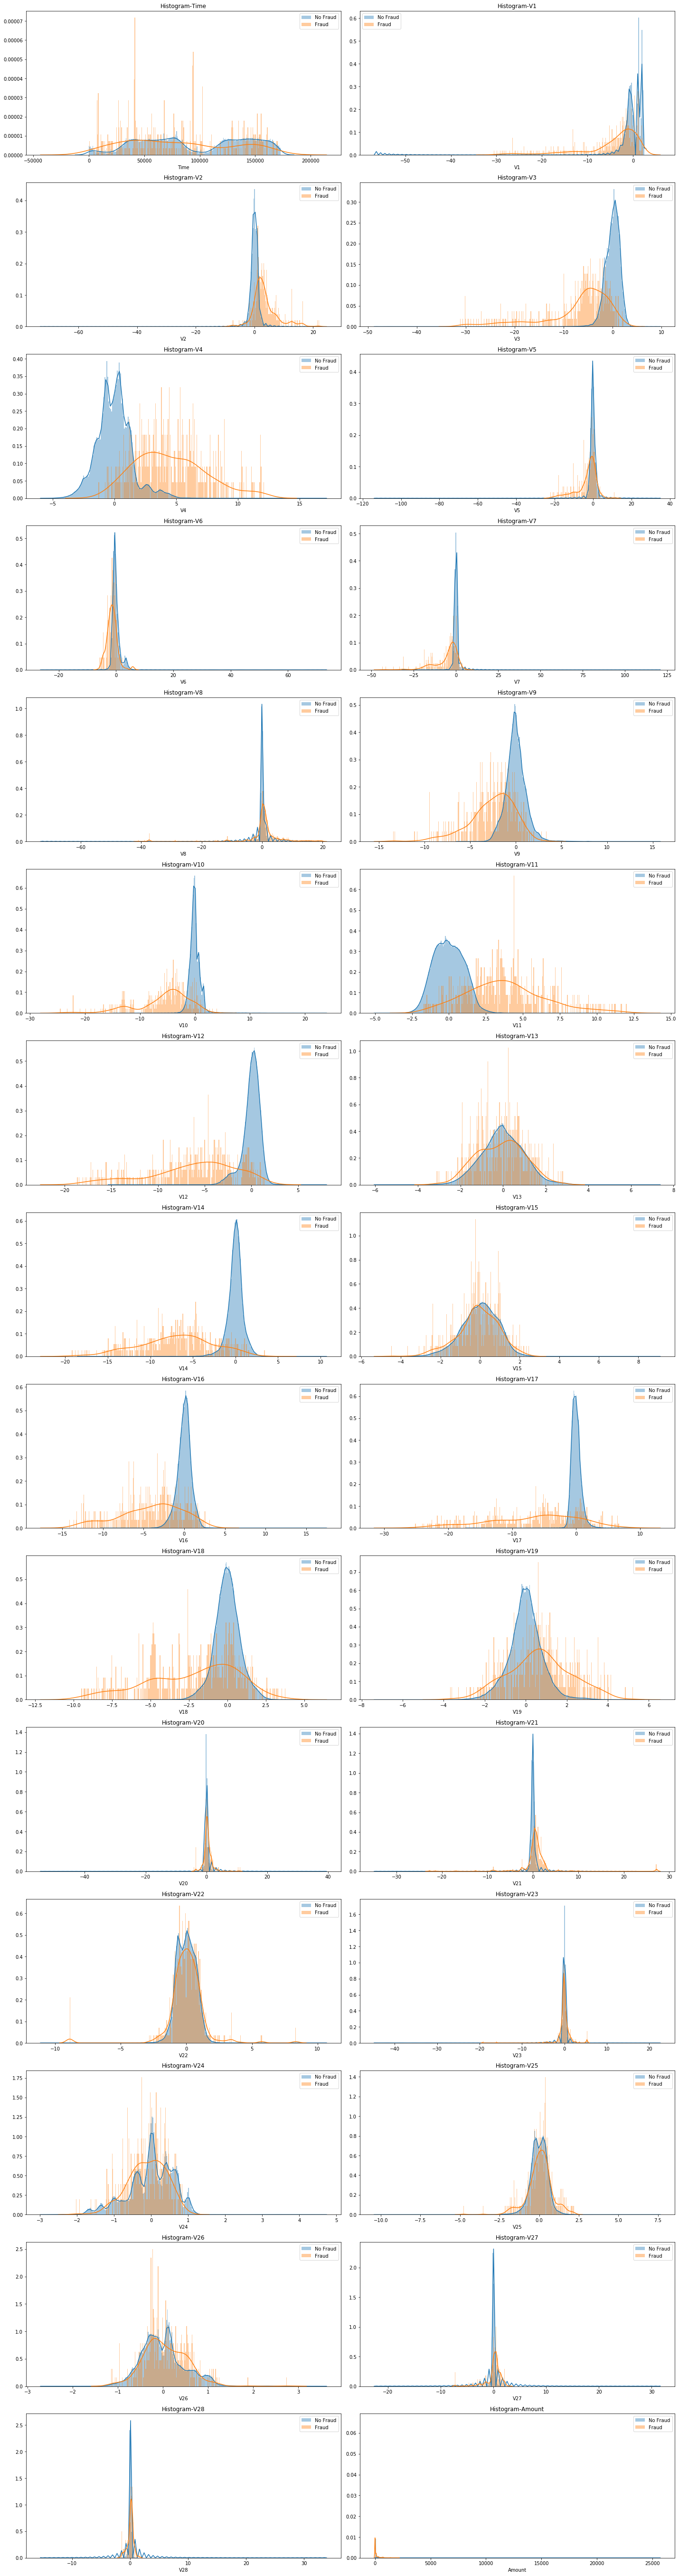

In [8]:
# Lets plot histogram

print('Histogram plots of all features, label')

histcol = 2
histrow = 16
fig = plt.figure(figsize=(20,80))

for i,feat in enumerate(df_cc.columns[:-1]):
    ax = fig.add_subplot(histrow,histcol,i+1)
    sns.distplot(df_cc[df_cc.Class==0][feat],bins=300,ax=ax)
    sns.distplot(df_cc[df_cc.Class==1][feat],bins=300,ax=ax)
    #df_cc[feat].hist(bins=300,ax=ax)  
    ax.legend(['No Fraud', 'Fraud'])
    ax.set_title("Histogram-"+feat)
    
plt.tight_layout() 
plt.show()
        

### Split train-test-dev data in 60-20-20 ratio.
Training data does not need Faud transactions

In [9]:
# Split test data
df_traindev, df_test = train_test_split(df_cc[df_cc.Class==0],test_size=.2)
df_devfraud, df_remain = train_test_split(df_cc[df_cc.Class==1],test_size=.5)
df_test = pd.concat([df_test,df_remain])

In [10]:
# Split train and dev data
df_train, df_remain = train_test_split(df_traindev,train_size=.75)
df_dev = pd.concat([df_devfraud,df_remain])

### Find feature importance using student-t test
Compare fraud data features against features of Non fraud data 

In [11]:
#Feature importance using df_traindev and df_devfraud - using t-test
features = df_traindev.columns[1:-1]
val1,val2=ttest_ind(df_traindev[features], df_devfraud[features],axis=0, equal_var=False)
Feat_imp = pd.DataFrame({'columns':features[np.argsort(val2)],'pval':val2[np.argsort(val2)]})
Feat_imp

,columns,pval
0,V14,6.836664e-69
1,V4,1.095016e-67
2,V11,7.565097e-58
3,V12,1.984800e-53
4,V10,1.534089e-47
5,V9,6.226942e-43
6,V16,5.040112e-42
7,V3,1.971816e-38
8,V17,6.782868e-37
9,V2,1.632158e-31


In [12]:
#Find best F1 scores, other scores for given number of features
def find_bestF1(no_feat,min_prob=0.0,max_prob=0.0,step=1000,log=True):
    impcol = Feat_imp[:no_feat]['columns']
    train_mean,train_var,train_cov = df_train[impcol].mean(),df_train[impcol].var(),df_train[impcol].cov()
    pval = multivariate_normal(mean=train_mean, cov=train_cov).pdf(df_dev[impcol])
    if min_prob == 0.0 and max_prob == 0.0:
        start = np.min(pval[(df_dev.Class==1) & (pval>0)])
        end = np.max(pval[df_dev.Class==1])        
    else :
        start = min_prob
        end = max_prob
    step = 1000.0
    if log==True:
        x = np.geomspace(start,end,num=step)
    else :
        x = np.linspace(start,end,num=step)
    y = np.array([f1_score(df_dev['Class'],
                 [1 if (x<eps) else 0 for x in pval]) 
        for eps in x])
    epsilon=x[np.argmax(y)]
    bestF1=np.max(y)
    recall=recall_score(df_dev['Class'],[1 if (x<epsilon) else 0 for x in pval])
    precision=precision_score(df_dev['Class'],[1 if (x<epsilon) else 0 for x in pval])
    accuracy=accuracy_score(df_dev['Class'],[1 if (x<epsilon) else 0 for x in pval])
    return(epsilon,bestF1,recall,precision,accuracy,x,y,pval)

### Training
Let's pick first 12 important features and find epsilon & other score against best F1-score.
We will use log scale to search epsilon between min and max p-value and best F1-score.

Note:
1) We've chosen 12 as arbitrary to prove we can find different scores quickly. Once proven we would look at what different numbers of features would give us
2) Since the value of epsilon can be sensitive to scores, we would use log scale to find the range that give the best output.

In [25]:
# Search within min and max with log scale
epsilon,bestF1,recall,precision,accuracy,x,y,dev_pval = find_bestF1(12,log=True)

# Scores
print('Epsilson: {} \nF1-score: {} \nRecall: {} \nPrecision: {} \nAccuracy: {}'.format(epsilon,bestF1,recall,precision,accuracy))


Epsilson: 1.1236110132881816e-88 
F1-score: 0.7957894736842106 
Recall: 0.7682926829268293 
Precision: 0.8253275109170306 
Accuracy: 0.9983014936349788


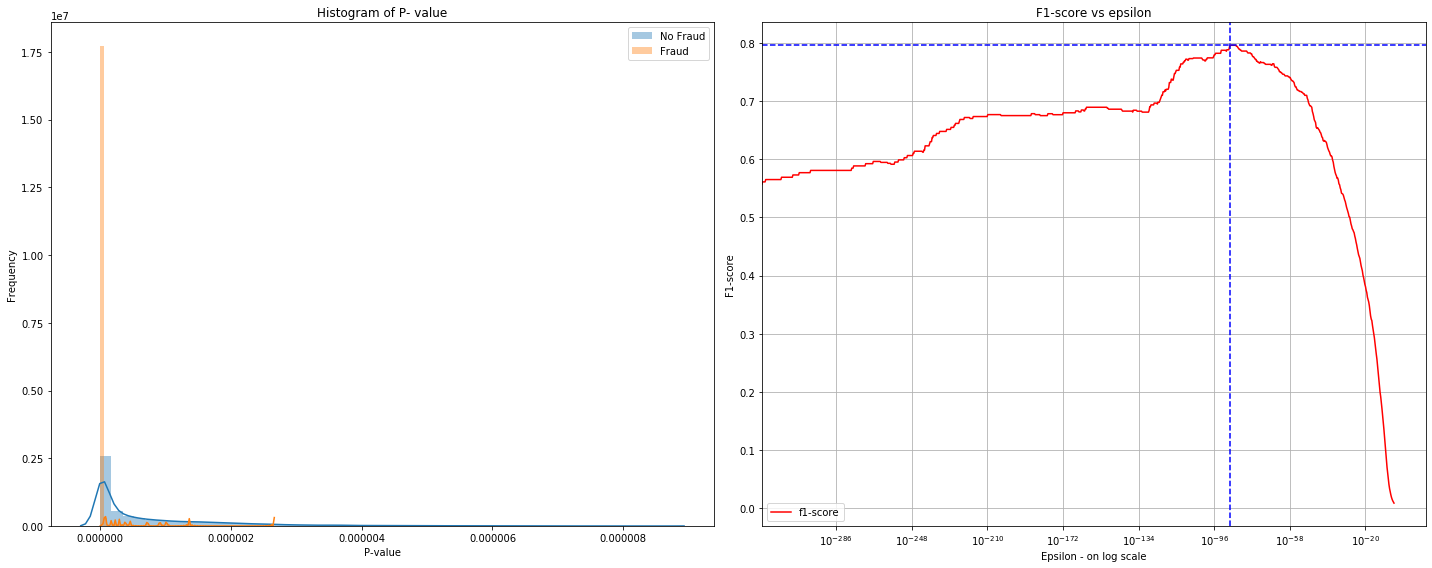

In [26]:
# plot the p value

def plot_score(dev_pval,x,y):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(1,2,1)
    sns.distplot(dev_pval[df_dev.Class==0], bins=50,ax=ax)
    sns.distplot(dev_pval[df_dev.Class==1], bins=50,ax=ax)
    ax.legend(['No Fraud', 'Fraud'])
    ax.set_xlabel('P-value')
    ax.set_ylabel('Frequency')
    ax.set_title('Histogram of P- value')

    ax = fig.add_subplot(1,2,2)
    ax.plot(x,y,label='f1-score',color='red')
    ax.axvline(x[np.argmax(y)],ls='--',color='blue')
    ax.axhline(np.max(y),ls='--',color='blue')
    #ax.axvline(x[np.argmax(y)-10],ls='--',color='lightblue')
    #ax.axvline(x[np.argmax(y)+30],ls='--',color='lightblue')
    ax.legend()
    ax.set_xlabel('Epsilon - on log scale')
    ax.set_xscale('log')
    ax.set_ylabel('F1-score')
    ax.set_title('F1-score vs epsilon')

    plt.grid()
    plt.tight_layout()
    plt.show()
    
plot_score(dev_pval,x,y)

Narrow the search window and check if it improves the F1-score

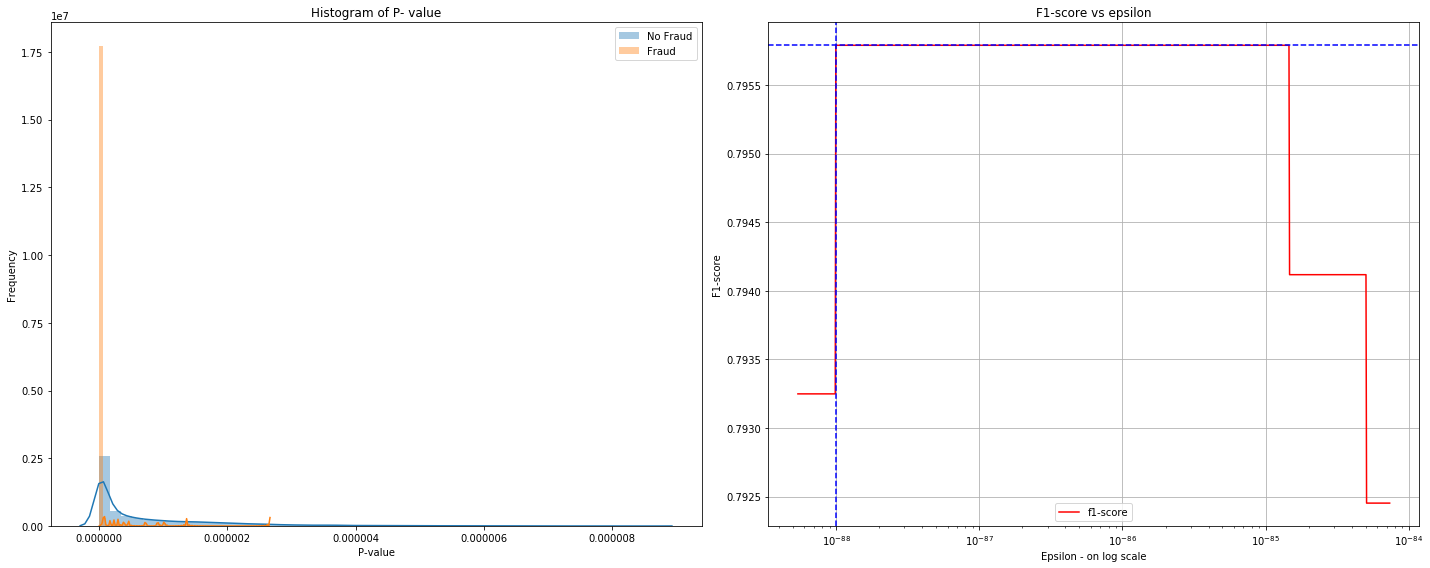

In [29]:
# Search in narrow window
epsilon,bestF1,recall,precision,accuracy,x,y,dev_pval = find_bestF1(12,min_prob=np.min(x[y>bestF1*.995]),max_prob=np.max(x[y>bestF1*.995]),log=True)
    
plot_score(dev_pval,x,y)

Scores after narrow search

In [30]:
# Scores
print('Epsilson: {} \nF1-score: {} \nRecall: {} \nPrecision: {} \nAccuracy: {}'.format(epsilon,bestF1,recall,precision,accuracy))

Epsilson: 9.941421966814326e-89 
F1-score: 0.7957894736842106 
Recall: 0.7682926829268293 
Precision: 0.8253275109170306 
Accuracy: 0.9983014936349788


Not much improvement in that narrow search range

In [31]:
#Confusion matrix - Dev dataset
pred=[1 if (x<epsilon) else 0 for x in dev_pval]
confusion_matrix(df_dev['Class'],pred)

array([[56823,    40],
       [   57,   189]], dtype=int64)

### Search for optimum number of features that would give best F1-score

In [32]:
# Search for number of features with best F1-score
eps,f1,rec,prec,acc = defaultdict(int),defaultdict(int),defaultdict(int),defaultdict(int),defaultdict(int)
for i in range(28):
    eps[i+1],f1[i+1],rec[i+1],prec[i+1],acc[i+1],_,_,_ = find_bestF1(i+1)


C:\Users\miraj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


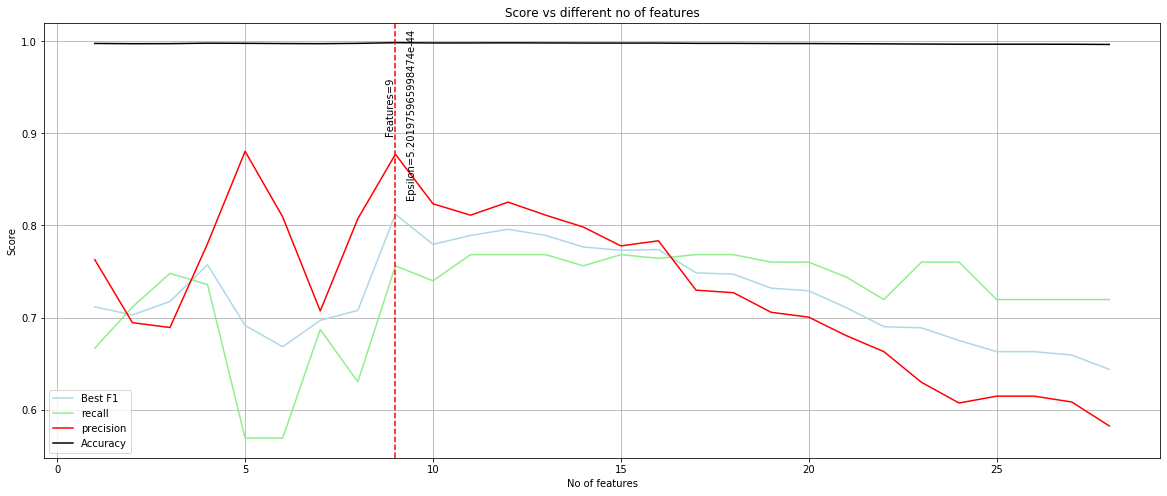

In [33]:
# Plot the results
plt.figure(figsize=(20,8))
x1 = [i+1 for i in range(28)]
y1 = [f1[i] for i in x1]
y2 = [rec[i] for i in x1]
y3 = [prec[i] for i in x1]
y4 = [acc[i] for i in x1]

plt.plot(x1,y1,label='Best F1',color='lightblue')
plt.plot(x1,y2,label='recall',color='lightgreen')
plt.plot(x1,y3,label='precision',color='red')
plt.plot(x1,y4,label='Accuracy',color='black')
plt.axvline(x=x1[np.argmax(y1)],ls='--',color='red')
best_feat = x1[np.argmax(y1)]
best_eps = eps[np.argmax(y1)]
plt.text(x1[np.argmax(y1)]*.97,0.9,'Features='+str(best_feat),rotation=90)
plt.text(x1[np.argmax(y1)]*1.03,0.83,'Epsilon='+str(best_eps),rotation=90)
plt.xlabel('No of features')          
plt.ylabel('Score')
plt.title('Score vs different no of features')
plt.legend()
plt.grid()
plt.show();

### Final figures on dev data

In [34]:
#Print Best scores
print('Optimum no of Features: {} \nEpsilon: {}, \nF1-score: {}, \nRecall: {}, \nPrecision: {}, \nAccuracy:{}'
      .format(best_feat,best_eps,y1[np.argmax(y1)],y2[np.argmax(y1)],y3[np.argmax(y1)],y4[np.argmax(y1)]))

Optimum no of Features: 9 
Epsilon: 5.201975965998474e-44, 
F1-score: 0.8122270742358079, 
Recall: 0.7560975609756098, 
Precision: 0.8773584905660378, 
Accuracy:0.9984941077588472


In [35]:
# Prediction on dev data
impcol=Feat_imp[:best_feat]['columns']
train_mean,train_var,train_cov = df_train[impcol].mean(),df_train[impcol].var(),df_train[impcol].cov()

dev_pred = [1 if (x<best_eps) else 0 for x in 
             multivariate_normal(mean=train_mean, cov=train_cov).pdf(df_dev[impcol])
             ]
confusion_matrix(df_dev['Class'],dev_pred)

array([[56809,    54],
       [   56,   190]], dtype=int64)

### Prediction on test data

In [36]:
# Prediction on test data
test_pred = [1 if (x<best_eps) else 0 for x in 
             multivariate_normal(mean=train_mean, cov=train_cov).pdf(df_test[impcol])
             ]
confusion_matrix(df_test['Class'],test_pred)

array([[56810,    53],
       [   48,   198]], dtype=int64)

In [37]:
print('Test data --- \nF1-score: {} \nRecall: {} \nPrecision: {} \nAccuracy: {}'
      .format(f1_score(df_test['Class'],test_pred),
              recall_score(df_test['Class'],test_pred),
              precision_score(df_test['Class'],test_pred),
              accuracy_score(df_test['Class'],test_pred)))

Test data --- 
F1-score: 0.7967806841046278 
Recall: 0.8048780487804879 
Precision: 0.7888446215139442 
Accuracy: 0.9982314521353902


In [41]:
# Save train, dev and test dataset for comparing result with other model's output
df_train.to_csv('C:\Myprojects\Dev\py3\creditcard_train.csv')
df_dev.to_csv('C:\Myprojects\Dev\py3\creditcard_dev.csv')
df_test.to_csv('C:\Myprojects\Dev\py3\creditcard_test.csv')